* Course    : CS513 - Knowledge Discovery and Data Mining
* First Name: John
* Last Name : Rizzo
* Student ID: 20036833
* Purpose   : CS513_HW_06

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from c50 import C5_0

from ydata_profiling import ProfileReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
coltype = {
    'Sample': 'Int64',
    'F1': 'Int64',
    'F2': 'Int64',
    'F3': 'Int64',
    'F4': 'Int64',
    'F5': 'Int64',
    'F6': 'Int64',
    'F7': 'Int64',
    'F8': 'Int64',
    'F9': 'Int64',
    'Class': 'Int64'
}

folder = '../data/'

df = pd.read_csv(folder + 'breast-cancer-wisconsin.csv',
                 na_values='?', 
                 dtype=coltype)
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df['target'] = df['Class'].map({4: 'malignant', 2: 'benign'})
df['target'] = df['target'].astype('category')
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class,target
0,1000025,5,1,1,1,2,1,3,1,1,2,benign
1,1002945,5,4,4,5,7,10,3,2,1,2,benign
2,1015425,3,1,1,1,2,2,3,1,1,2,benign
3,1016277,6,8,8,1,3,4,3,7,1,2,benign
4,1017023,4,1,1,3,2,1,3,1,1,2,benign


In [4]:
print(df.isna().sum())

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
target     0
dtype: int64


In [5]:
attr = df.drop(['Class', 'target'], axis=1)
target = df['target']
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [6]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [7]:
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[128   9]
 [  7  66]]
              precision    recall  f1-score   support

      benign       0.95      0.93      0.94       137
   malignant       0.88      0.90      0.89        73

    accuracy                           0.92       210
   macro avg       0.91      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



In [8]:
plt.figure(figsize=(50,30), dpi=250)
tree.plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.42857142857142855, 0.9444444444444444, 'F2 <= 2.5\nentropy = 0.928\nsamples = 489\nvalue = [321, 168]'),
 Text(0.19047619047619047, 0.8333333333333334, 'F6 <= 5.5\nentropy = 0.141\nsamples = 301\nvalue = [295, 6]'),
 Text(0.30952380952380953, 0.8888888888888888, 'True  '),
 Text(0.09523809523809523, 0.7222222222222222, 'F1 <= 7.5\nentropy = 0.033\nsamples = 295\nvalue = [294, 1]'),
 Text(0.047619047619047616, 0.6111111111111112, 'entropy = 0.0\nsamples = 294\nvalue = [294, 0]'),
 Text(0.14285714285714285, 0.6111111111111112, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.7222222222222222, 'F1 <= 3.0\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.23809523809523808, 0.6111111111111112, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.6111111111111112, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.8333333333333334, 'F3 <= 3.5\nentropy = 0.58\nsamples = 188\nvalue = [26, 162]'),
 Text(0.5476

Problem 6.3

Use the Random Forest methodology to dvelop a classification model for the Diagnosis and identify important features.

In [9]:
attr = df.drop(['Class', 'target'], axis=1)
target = df['target']
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [10]:
classifier = RandomForestClassifier(n_estimators=100)

In [11]:
classifier.fit(attr_train,target_train)
target_pred = classifier.predict(attr_test)

In [13]:
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))
print(accuracy_score(target_test, target_pred))

[[130   7]
 [  4  69]]
              precision    recall  f1-score   support

      benign       0.97      0.95      0.96       137
   malignant       0.91      0.95      0.93        73

    accuracy                           0.95       210
   macro avg       0.94      0.95      0.94       210
weighted avg       0.95      0.95      0.95       210

0.9476190476190476


In [14]:
plt.figure(figsize=(50,30), dpi=250)
tree.plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.42857142857142855, 0.9444444444444444, 'F2 <= 2.5\nentropy = 0.928\nsamples = 489\nvalue = [321, 168]'),
 Text(0.19047619047619047, 0.8333333333333334, 'F6 <= 5.5\nentropy = 0.141\nsamples = 301\nvalue = [295, 6]'),
 Text(0.30952380952380953, 0.8888888888888888, 'True  '),
 Text(0.09523809523809523, 0.7222222222222222, 'F1 <= 7.5\nentropy = 0.033\nsamples = 295\nvalue = [294, 1]'),
 Text(0.047619047619047616, 0.6111111111111112, 'entropy = 0.0\nsamples = 294\nvalue = [294, 0]'),
 Text(0.14285714285714285, 0.6111111111111112, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.7222222222222222, 'F1 <= 3.0\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.23809523809523808, 0.6111111111111112, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.6111111111111112, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6666666666666666, 0.8333333333333334, 'F3 <= 3.5\nentropy = 0.58\nsamples = 188\nvalue = [26, 162]'),
 Text(0.5476

In [15]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
print("Feature Ranking")
for f in range(attr_train.shape[1]):
    print(f"{f + 1}. {attr_train.columns[indices[f]]} ({importances[indices[f]]})")

Feature Ranking


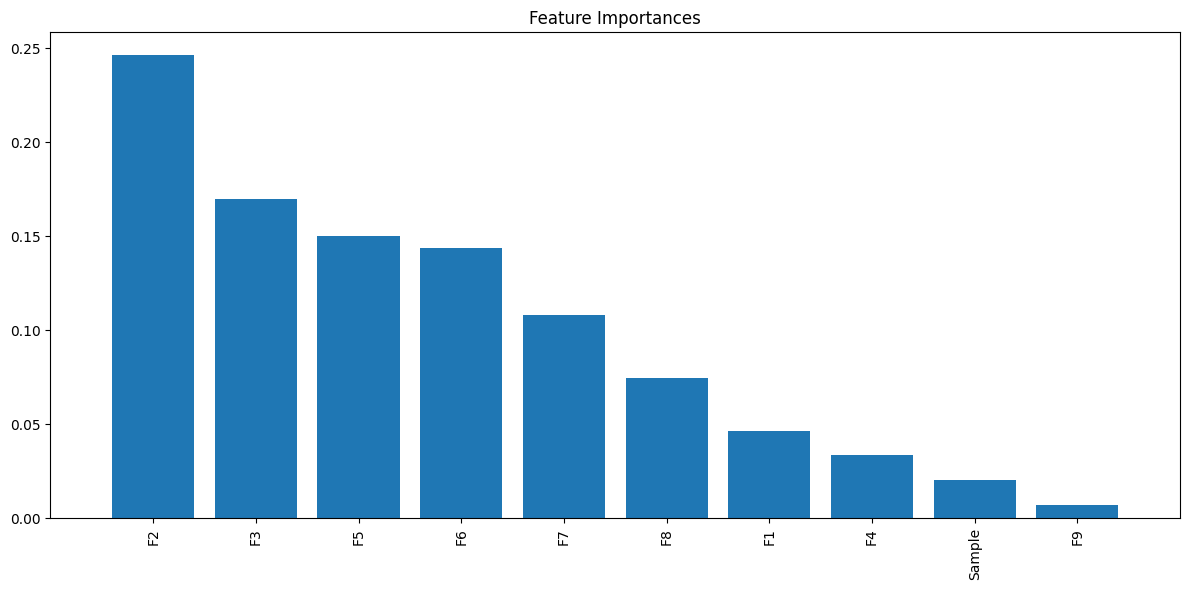

In [17]:
# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(attr_train.shape[1]), importances[indices], align="center")
plt.xticks(range(attr_train.shape[1]), attr_train.columns[indices], rotation=90)
plt.xlim([-1, attr_train.shape[1]])
plt.tight_layout()
plt.show()